# Model Building

In [1]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [4]:
# Loading Dataset
df=pd.read_csv('/content/drive/MyDrive/IBM/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
# To remove warnings
import warnings
warnings.filterwarnings('ignore')

# Checking For Null Values

In [5]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling Categorical Values

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
le=LabelEncoder()

In [15]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Spliting into dependent and independent data

In [17]:
df=df.drop(columns=["Loan_ID"],axis=1)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [19]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [20]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [21]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

# Scaling The Data

In [22]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.45164,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.45164,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.45164,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.45164,1.223298


# Balancing The Dataset

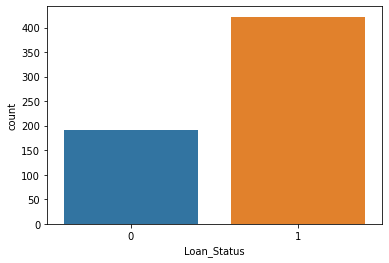

In [25]:
sns.countplot(df.Loan_Status)

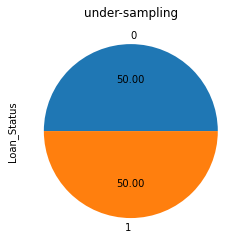

In [30]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

# Splitting Data Into Train And Test


In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [32]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
245,1,0,0,0,1,6050,4333.0,120.0,180.0,1.0,2
413,1,1,0,1,0,2253,2033.0,110.0,360.0,1.0,0
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2
188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0


In [33]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,1,0,0,0,0,3158,3053.0,89.0,360.0,1.000000,0
323,0,0,0,0,0,3166,2985.0,132.0,360.0,0.842199,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.000000,1
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.000000,1
518,1,0,0,0,0,4683,1915.0,185.0,360.0,1.000000,1


In [34]:
ytrain.head()

245    0
413    1
126    1
531    1
188    1
Name: Loan_Status, dtype: int64

In [35]:
ytest.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int64

In [36]:
xtrain.shape

(429, 11)

In [38]:
xtest.shape

(185, 11)

In [39]:
ytrain.shape

(429,)

In [40]:
ytest.shape

(185,)

# Model Building

# Decision Tree Model

In [41]:
dmodel=DecisionTreeClassifier(random_state=100)

In [42]:
dmodel.fit(x_res,y_res)

DecisionTreeClassifier(random_state=100)

In [43]:
ypredd=dmodel.predict(xtest)

In [46]:
ypred2d=dmodel.predict(xtrain)

In [47]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))

Decision Tree Model Testing Accuracy
0.8054054054054054
Decision Tree Model Training Accuracy
0.8484848484848485


# Random Forest Model

In [48]:
Rmodel=RandomForestClassifier(n_estimators=100)

In [49]:
Rmodel.fit(x_res,y_res)

RandomForestClassifier()

In [50]:
ypredR=Rmodel.predict(xtest)

In [51]:
ypred2R=Rmodel.predict(xtrain)

In [52]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.8918918918918919
Random Forest Model Training Accuracy
0.8974358974358975


# KNN Model

In [53]:
kmodel=KNeighborsClassifier()

In [54]:
kmodel.fit(x_res,y_res)

KNeighborsClassifier()

In [59]:
ypredk=kmodel.predict(xtest)

In [60]:
ypred2k=kmodel.predict(xtrain)

In [61]:
print("KNN Model Testing Accuracy")
print(accuracy_score(ytest,ypredk))
print("KNN Model Training Accuracy")
print(accuracy_score(ytrain,ypred2k))

KNN Model Testing Accuracy
0.6
KNN Model Training Accuracy
0.6386946386946387


# Xgboost Model

In [62]:
xmodel=XGBClassifier(eval_metric='mlogloss',n_estimators=100,random_state=100)

In [63]:
xmodel.fit(x_res,y_res)

XGBClassifier(eval_metric='mlogloss', random_state=100)

In [64]:
ypredx=xmodel.predict(xtest)

In [65]:
ypred2x=xmodel.predict(xtrain)

In [66]:
print("Xgboost Model Testing Accuracy")
print(accuracy_score(ytest,ypredx))
print("Xgboost Model Training Accuracy")
print(accuracy_score(ytrain,ypred2x))

Xgboost Model Testing Accuracy
0.7837837837837838
Xgboost Model Training Accuracy
0.8438228438228438
